# Argosim tutorial - Part 1

In this tutorial we will explore the `antenna_utils` module. This module is used to generate diverse radio arrays configurations, get the array's baselines, and compute the uv-sampling under different observation strategies including multi-frequency observations and source tracking.

In [ ]:
# Import the argosim package

import sys

# added the "argosim" directory
sys.path.append(r'C:\Users\manoula\argosim\src')

import argosim



We will import the module and explore its functionalities. The documentation of the module can be found [here](https://argos-telescope.github.io/argosim/argosim.antenna_utils.html).

In [3]:
# Import the antena_utils module and display help
from argosim import antenna_utils


Identify which functions can be used to generate a radio array configuration. 

circular_antenna_arr(n_antenna=3,r=300)
random_antenna_arr(n_antenna=3,E_lim=1000,N_lim=1000,U_lim=0,seed=None)
uni_antenna_array(n_antenna_E=32,n_antenna_N=32, E_lim=800,N_lim=800,U_lim=0)
y_antenna_arr(n_antenna=5, r=5000, alpha=0)




What are the inputs of these functions and what are the default values?

circular_antenna_arr(n_antenna=3,r=300.0)
--> n_antenna(int)
--> r(float)

random_antenna_arr(n_antenna=3,E_lim=1000.0,N_lim=1000.0,U_lim=0.0,seed=None)
--> n_antenna(int)
--> E_lim(float) : east coordinate 
--> N_lim(float) : north coordinate 
--> U_lim(float) : the up coordinate 
--> seed(int) : optional seed 

uni_antenna_array(n_antenna_E=32,n_antenna_N=32, E_lim=800.0,N_lim=800.0, U_lim=0.0)
--> n_antenna_E(int) : nb of antennas in the N direction
--> n_antenna_N(int) : nb of antennas in the E directon 
--> E_lim(float) : east coordinate 
--> N_lim(float) : north coordinate 
--> U_lim(float) : the up coordinate 

y_antenna_arr(n_antenna=5, r=5000.0, alpha=0.0)
--> n_antenna(int) : nb of antennas per arm
--> r(float) : radius of the antenna array 
--> alpha(float) : the angle of the 1st arm (radians)

What are the outputs of these functions?

circular_antenna_arr(n_antenna=3,r=300.0)
--> antenna_arr : position
    np.ndarray 

random_antenna_arr(n_antenna=3,E_lim=1000.0,N_lim=1000.0,U_lim=0.0,seed=None)
--> antenna_arr : position in ENU coordinates 
    np.ndarry

uni_antenna_array(n_antenna_E=32,n_antenna_N=32, E_lim=800.0,N_lim=800.0,
U_lim=0.0)
--> antenna_arr : position in ENU coordinates 
    np.ndarry

y_antenna_arr(n_antenna=5, r=5000.0, alpha=0.0)
--> antenna_arr : position in ENU coordinates 
    np.ndarry

Explain how the antenna arryas are parametrised.

...

Let's generate some antenna arrays configurations and plot them.

antennas array (position) (ENU):
[[ 331.36241675  447.88297335    0.        ]
 [ 126.81971421  -86.38638781    0.        ]
 [-493.87611088 -142.02916214    0.        ]
 [ 384.37109988  300.11404922    0.        ]
 [ 365.88257956  437.17396365    0.        ]
 [-144.67541593  165.06323334    0.        ]
 [-297.93694226  318.70181222    0.        ]
 [-196.55410397 -481.33047359    0.        ]
 [ 281.02273387  290.20407779    0.        ]
 [ 129.42656879   18.88720569    0.        ]
 [-201.86805071  281.71520581    0.        ]
 [ 171.19679256  277.55583993    0.        ]
 [ 449.69043382  403.19619246    0.        ]]


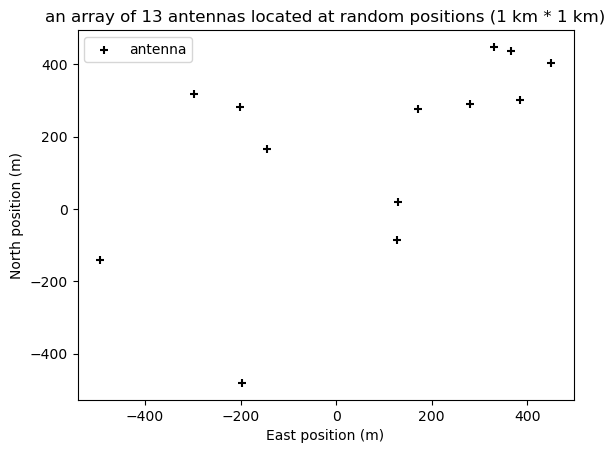

In [ ]:
# Generate an array of 13 antennas located at random positions in a surface of 1 km by 1 km.
import numpy as np
import matplotlib.pyplot as plt
from argosim import antenna_utils

n_antenna = 13
E_lim = 1000.0
N_lim = 1000.0
U_lim = 0       #ground height 

antenna_array = antenna_utils.random_antenna_arr(n_antenna=n_antenna,E_lim=E_lim, N_lim=N_lim, U_lim=U_lim)

# diplaying the data table 

print("antennas array (position) (ENU):")
print(antenna_array)


#extract East and north coordinates 

E_positions = antenna_array[:,0]
N_positions = antenna_array[:,1]

#diplay figure 

plt.figure(figsize(8,8))
plt.scatter(E_positions, N_positions, marker='o', color='black', label='antenna')
plt.xlabel("East position (m)")
plt.ylabel("North position (m)")
plt.title(f"an array of {n_antenna} antennas located at random positions (1 km * 1 km)")
plt.legend()
plt.show()

Now we will play around with the generated array using numpy.

* Compute the centre of the array

 the center can be calculated as the mean of the antenna position 

In [16]:
# Define a function that computes the centre of an array

def compute_center(array):
    return np.mean(array, axis=0)


In [32]:
# diplay center 

center= compute_center(antenna_array)
print(f"center of array : ,{center}")

center of array : ,[ 69.60474736 171.59604076   0.        ]


* Compute the maximum separation between antennas.

I calculate the euclidean distance between all pairs of atennas and find the maximum


In [44]:
# Compute the maximum separation between antennas.

from itertools import combinations 

def max_separation(array):
    max_dist=0
    max_pair =None
    for i,j in combinations(range(len(array)),2):
        dist= np.linalg.norm(array[i]-array[j])
        if dist> max_dist:
            max_dist=dist
            max_pair=(i,j)
    return max_dist,max_pair

# Which antennas conform the maximum separation?

max_dist, max_pair = max_separation(antenna_array)

antenna_max1, antenna_max2 = antenna_array[max_pair[0]], antenna_array[max_pair[1]]

print(f"max seperation : {max_dist} between antennas {max_pair} at position {antenna_max1} and {antenna_max2}")


max seperation : 1095.453981489597 between antennas (7, 12) at position [-196.55410397 -481.33047359    0.        ] and [449.69043382 403.19619246   0.        ]


In [45]:
# Compute the minimum separation between antennas.

def min_separation(array):
    min_dist= float('inf')
    min_pair= None
    for i,j in combinations(range(len(array)),2):
        dist= np.linalg.norm(array[i]-array[j])
        if dist < min_dist and dist>0 :
            min_dist=dist
            min_pair=(i,j)
    return min_dist,min_pair

# Which antennas conform the minimum separation?


min_dist, min_pair = min_separation(antenna_array)

antenna_min1, antenna_min2 = antenna_array[min_pair[0]], antenna_array[min_pair[1]]

print(f"min seperation : {min_dist} between antennas {min_pair} at position {antenna_min1} and {antenna_min2}")




min seperation : 36.14311178507805 between antennas (0, 4) at position [331.36241675 447.88297335   0.        ] and [365.88257956 437.17396365   0.        ]


We will now display the antenna array in a 2D plot using `matplotlib`.

In [ ]:
# Import pyplot from the matplotlib library


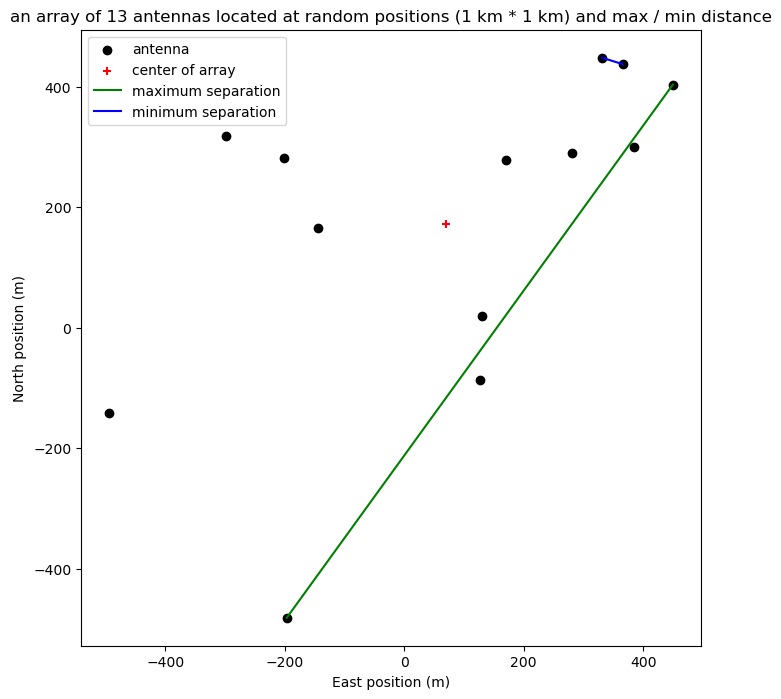

In [ ]:
# Plot the antenna positions in 2D.
# - The plot should be square with equal scales on both axes.
# - The plot should have a title.
# - The plot should have labels for the x and y axes (propose a label that makes sense).
# - Display the array centre as a red cross.
# - Connect the furthest antennas with a green line.
# - Connect the closest antennas with a blue line.


#extract East and north coordinates 

E_positions = antenna_array[:,0]
N_positions = antenna_array[:,1]

#diplay figure 

plt.figure(figsize=(8,8))
plt.scatter(E_positions, N_positions, marker='o', color='black', label='antenna')
plt.scatter(center[0], center[1], marker='+', color='red', label='center of array')

#plot green line for max separation 

plt.plot([antenna_max1[0],antenna_max2[0]], [antenna_max1[1],antenna_max2[1]],'g-', label='maximum separation')


#plot bleu line for min separation 

plt.plot([antenna_min1[0],antenna_min2[0]], [antenna_min1[1],antenna_min2[1]],'b-', label='minimum separation')


#graph legend 

plt.xlabel("East position (m)")
plt.ylabel("North position (m)")
plt.title(f"an array of {n_antenna} antennas located at random positions (1 km * 1 km) and max / min distance")
plt.legend()
plt.show()

### Antenna configurations

We will now generate some antenna configurations and plot them using the `plot_utils` module.

In [4]:
# import the plot_utils module and display help.

from argosim import plot_utils



In [ ]:
# Which function from the plot_utils module would you use to plot the antenna positions?

argosim.plot_utils.plot_atenna_arr : function to plot the antenna in ground coordinates 

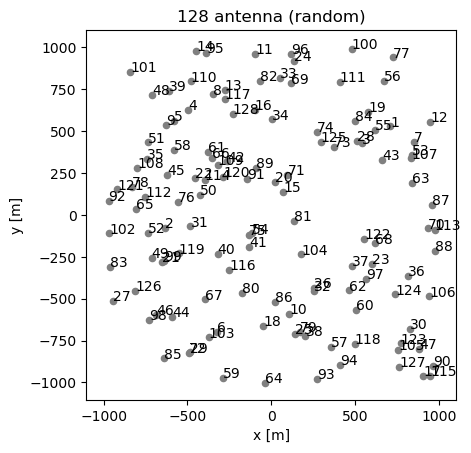

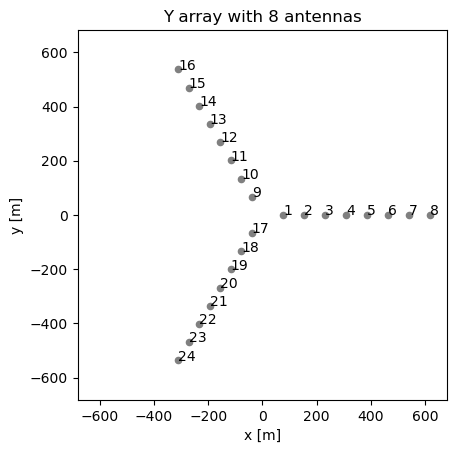

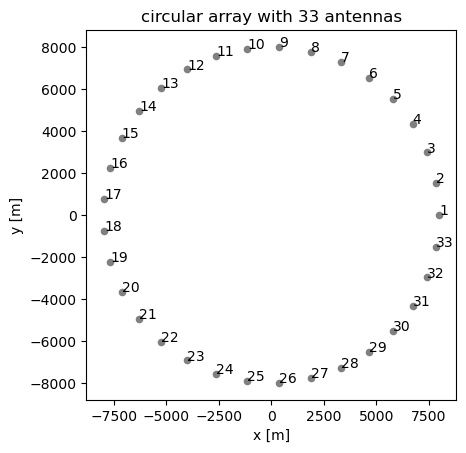

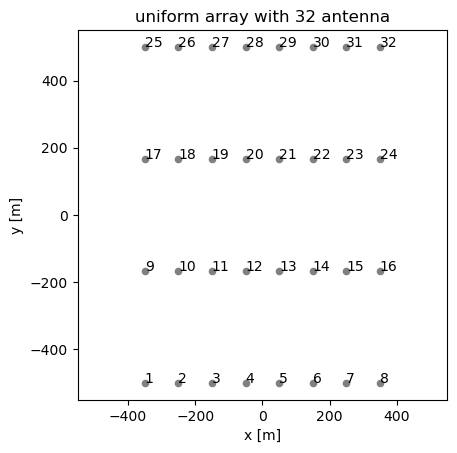

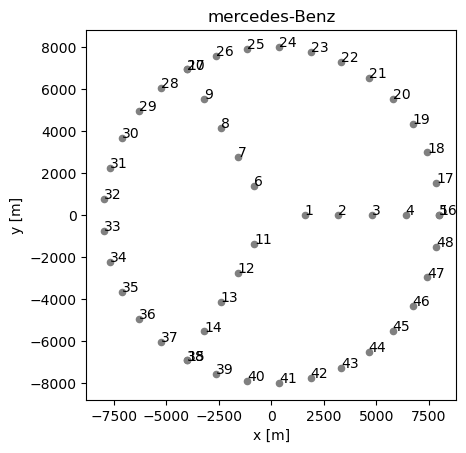

In [62]:
# Generate and plot the following antenna arrays:
# - 128 antennas located at random positions in a surface of 2 km by 2 km.
# - Y shaped array with 8 antennas per arm and an arm length of 620 m.
# - A circular array with 33 antennas and a radius of 8000 m.
# - (challenge) An uniformly spaced array with 32 antennas, having a minimum separation of 100 m and a maximum separation of 780 m.
# - (have fun) A Mercedes-Benz array. Hint: use the combine_antenna_arr function from the antenna_utils module.



import numpy as np 
import matplotlib.pyplot as plt 
from argosim import antenna_utils, plot_utils

# 128 antenna (2km*2km)

random_array_128 = antenna_utils.random_antenna_arr(n_antenna=128, E_lim= 2000, N_lim=2000)

# Y array with 8 antennas per arm 

y_array = antenna_utils.y_antenna_arr(n_antenna=8, r=620)

# a circular array with 33 antennas and r=8000m

circular_array= antenna_utils.circular_antenna_arr(n_antenna=33, r=8000)

#An uniformly spaced array with 32 antennas, having a minimum separation of 100 m and a maximum separation of 780 m.

uniform_array= antenna_utils.uni_antenna_array(n_antenna_E= 8, n_antenna_N=4, E_lim=700, N_lim=1000)

#A Mercedes-Benz array : use the combine_antenna
    #combine 3 arm 

arm1 = antenna_utils.y_antenna_arr(n_antenna=5, r=8000, alpha= 0)


mercedes_array = antenna_utils.combine_antenna_arr(arm1,circular_array)
#array plot

array= [(random_array_128, "128 antenna (random)"),(y_array,"Y array with 8 antennas"),(circular_array, "circular array with 33 antennas"),(uniform_array, "uniform array with 32 antenna"),(mercedes_array,"mercedes-Benz")]



for antenna_array, title in array : 
    plot_utils.plot_antenna_arr(antenna_array, ax=ax, title=title)

    




### Load and save antenna configurations

Load the `argos_pathfinder.enu.txt` file, located in `data/array_configs/`. The file can also be found at the [GitHub repository](https://github.com/ARGOS-telescope/argosim/tree/main/configs/arrays).

In [ ]:
# What does this file contain?



In [ ]:
# Use the function load_antenna_enu_txt from the ant_utils module.



In [ ]:
# Plot the array



In [ ]:
# Propose a function to save an array to a txt file in the same format as the one loaded by load_antenna_enu_txt.



In [ ]:
# Save the Mercedez Benz array to a txt file.




### Baselines
Explain what a baseline is in the context of radio interferometry.

...

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]


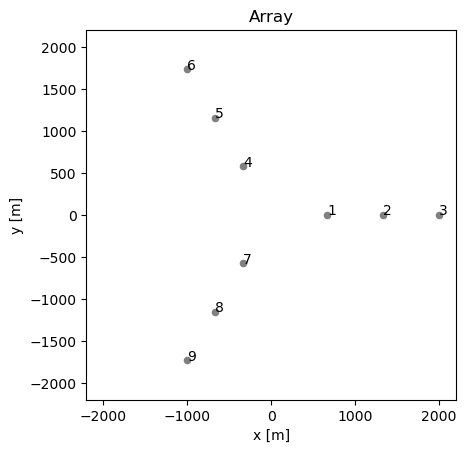

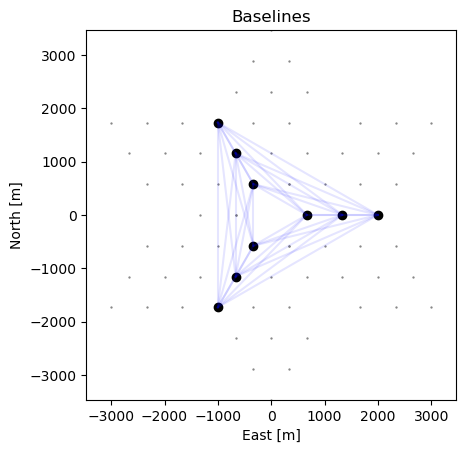

In [129]:
# Using the function get_baselines, compute the baselines of a Y shaped array 
# with 3 antennas per arm and an arm length of 2 km.
# Using the plot_baselines function from the plot_utils module, 
# plot the baselines of the Y shaped array setting the ENU option to True.

from itertools import combinations

y_array = antenna_utils.y_antenna_arr(n_antenna=3, r=2000)
plot_utils.plot_antenna_arr(y_array)

y_baselines =antenna_utils.get_baselines(y_array)
plot_utils.plot_baselines(y_baselines,ax=ax, ENU=True)

y_array_2 = y_array[:, :2] 

#combination 
unique_baslines =list(combinations(range(len(y_array_2)),2))
plt.scatter(y_array_2[:,0], y_array_2[:,1],color='black')

#plot unique_baseline
for (i,j) in unique_baslines:
    x1,y1 = y_array_2[i]
    x2,y2 = y_array_2[j]
    plt.plot([x1,x2],[y1,y2],'b-', alpha=0.1)

print(unique_baslines)

plt.show()

* What does the option `ENU=True` do in the `plot_baselines` function? We will use the option `ENU=False` in future tutorials.

ENU=True: Baselines are expressed relative to the Earth (m)

ENU=False: Baselines are expressed in UV space (normalized in wavelengths)

* What does each point in the plot represent?

Each point represents a component (x, y) of a baseline (distance between a pair of antennas)

* What do the x and y axes represent?

X = East-West component 
Y = North-South component 

In [ ]:
# How many baselines are there in total?

import scipy.special

n_antenna_total = len(y_array_2)
n_baselines = scipy.special.comb(n_antenna_total, 2, exact=True)

print(f"baseline : {n_baselines}")



  baseline  : 36


* How many points do you count on the baselines plot? What happened with the missing points?

the other baselines can interpose